# Main - market crash

This notebook runs an experiment on a market crash using the Bornholdt Ising Model. The goal is to observe how the market reacts to a sudden localized shock and whether the perturbation propagates over time.

In [122]:
from source.krachspinsystem import SpinSystem
from source.utils import read_config_file, reconstruct_grid, visualize_grid, plot_array_list
from datetime import datetime
import numpy as np
from numpy import empty, nan, savetxt
import matplotlib.pyplot as plt
import random

In [123]:
MAX_FILE_SIZE = 100_000

config_filename = "multising.conf"
config = read_config_file(config_filename)

In [124]:
#initialization

#parameters
grid_height   = int(config["grid_height"])
grid_width    = int(config["grid_width"])
alpha         = float(config["alpha"])
j             = float(config["j"])
total_updates = int(config["total_updates"])
init_up       = float(config["init_up"])
T             = float(config["T"])
beta          = 1 / T
reduced_alpha              = -2.0 * beta * alpha
reduced_neighbour_coupling = -2.0 * beta * j

magnetisation = empty((min(total_updates, MAX_FILE_SIZE), ), dtype=float)
magnetisation[:] = nan


# I. With market crash

In [125]:
#with krach
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

#init system
spin_system = SpinSystem(
    grid_height=32,
    grid_width=32,
    init_up=0.3
)

full_grids_with_krach = []
full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(100):
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    magnetisation[ii % MAX_FILE_SIZE] = mag
    full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

#choc local
spin_system.induce_local_crash(fraction=1, region="bottom_right")
mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))
magnetisation[100 % MAX_FILE_SIZE] = mag

# Maintenant on poursuit la simulation pour voir la propagation
for ii in range(101, total_updates-100):
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    full_grids_with_krach.append(reconstruct_grid(spin_system.black, spin_system.white))
    magnetisation[ii % MAX_FILE_SIZE] = mag

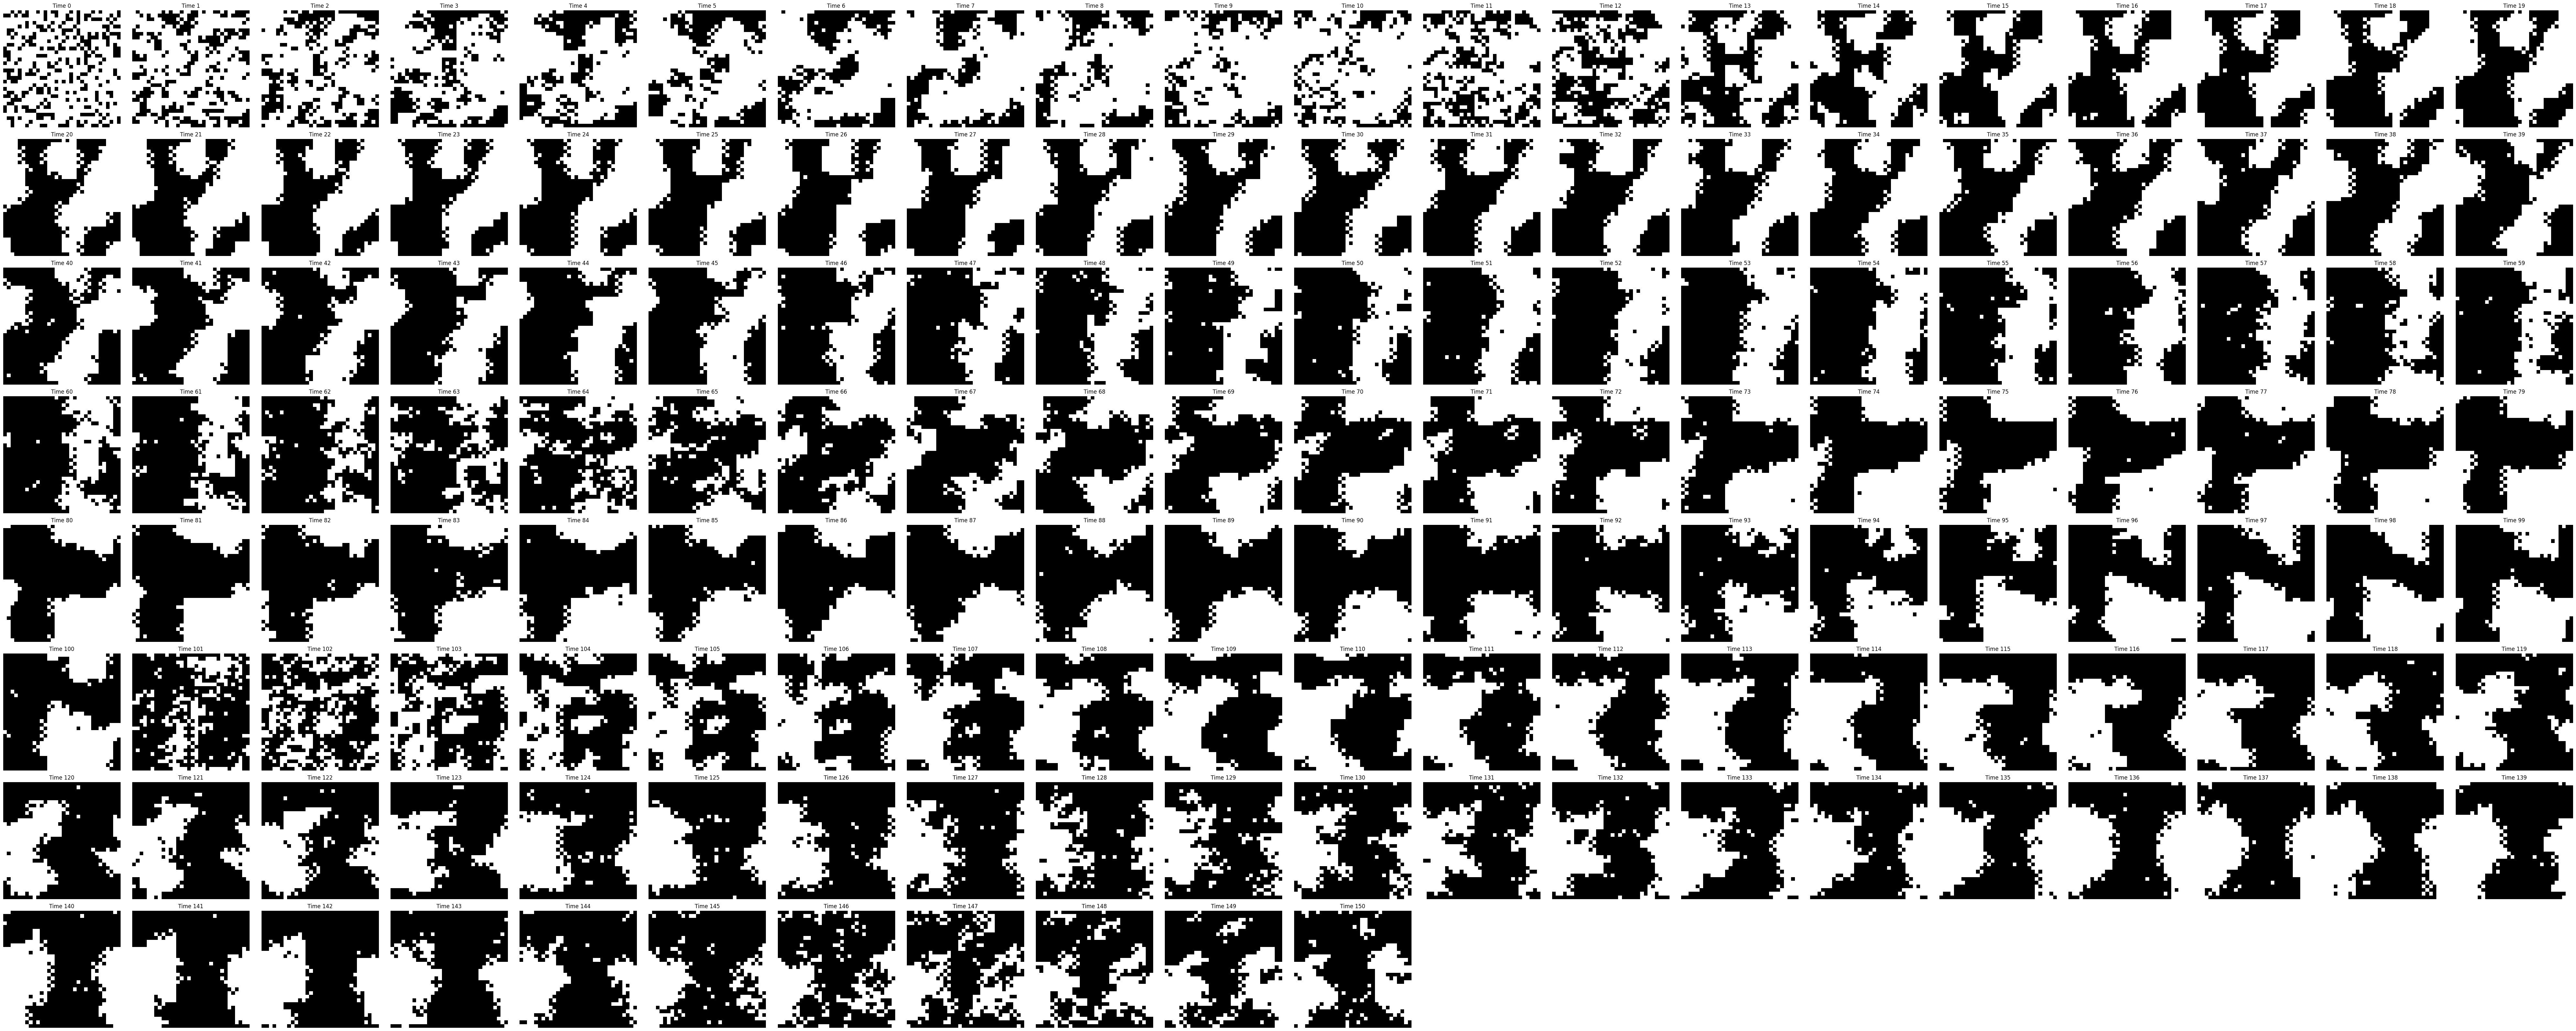

In [112]:
plot_array_list(full_grids_with_krach, max_cols=20)

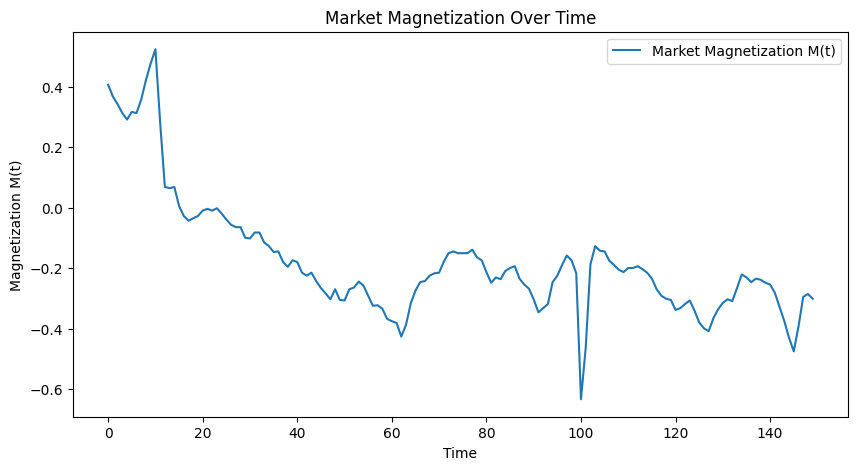

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(magnetisation, label="Market Magnetization M(t)")
plt.xlabel("Time")
plt.ylabel("Magnetization M(t)")
plt.title("Market Magnetization Over Time")
plt.legend()
plt.show()

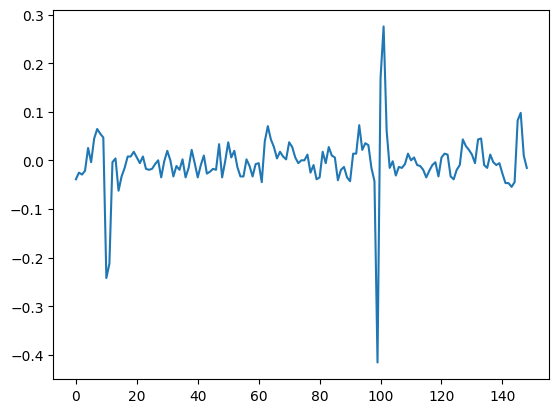

In [114]:
market_returns = np.diff(magnetisation)
plt.plot(market_returns)

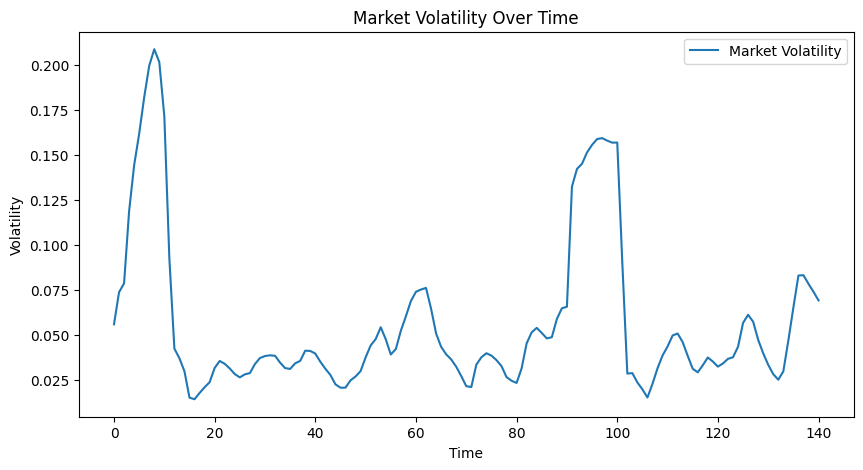

In [115]:
window_size = 10  # Fenêtre pour la volatilité
volatility = [np.std(magnetisation[i:i+window_size]) for i in range(len(magnetisation)-window_size)]

plt.figure(figsize=(10, 5))
plt.plot(volatility, label="Market Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()

# II. Without market crash

In [126]:
#sans krach

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

#init system
spin_system = SpinSystem(
    grid_height=32,
    grid_width=32,
    init_up=0.3
)

full_grids_without_krach = []
full_grids_without_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

for ii in range(total_updates):
    mag = spin_system.update(reduced_neighbour_coupling, reduced_alpha)
    magnetisation[ii % MAX_FILE_SIZE] = mag
    full_grids_without_krach.append(reconstruct_grid(spin_system.black, spin_system.white))

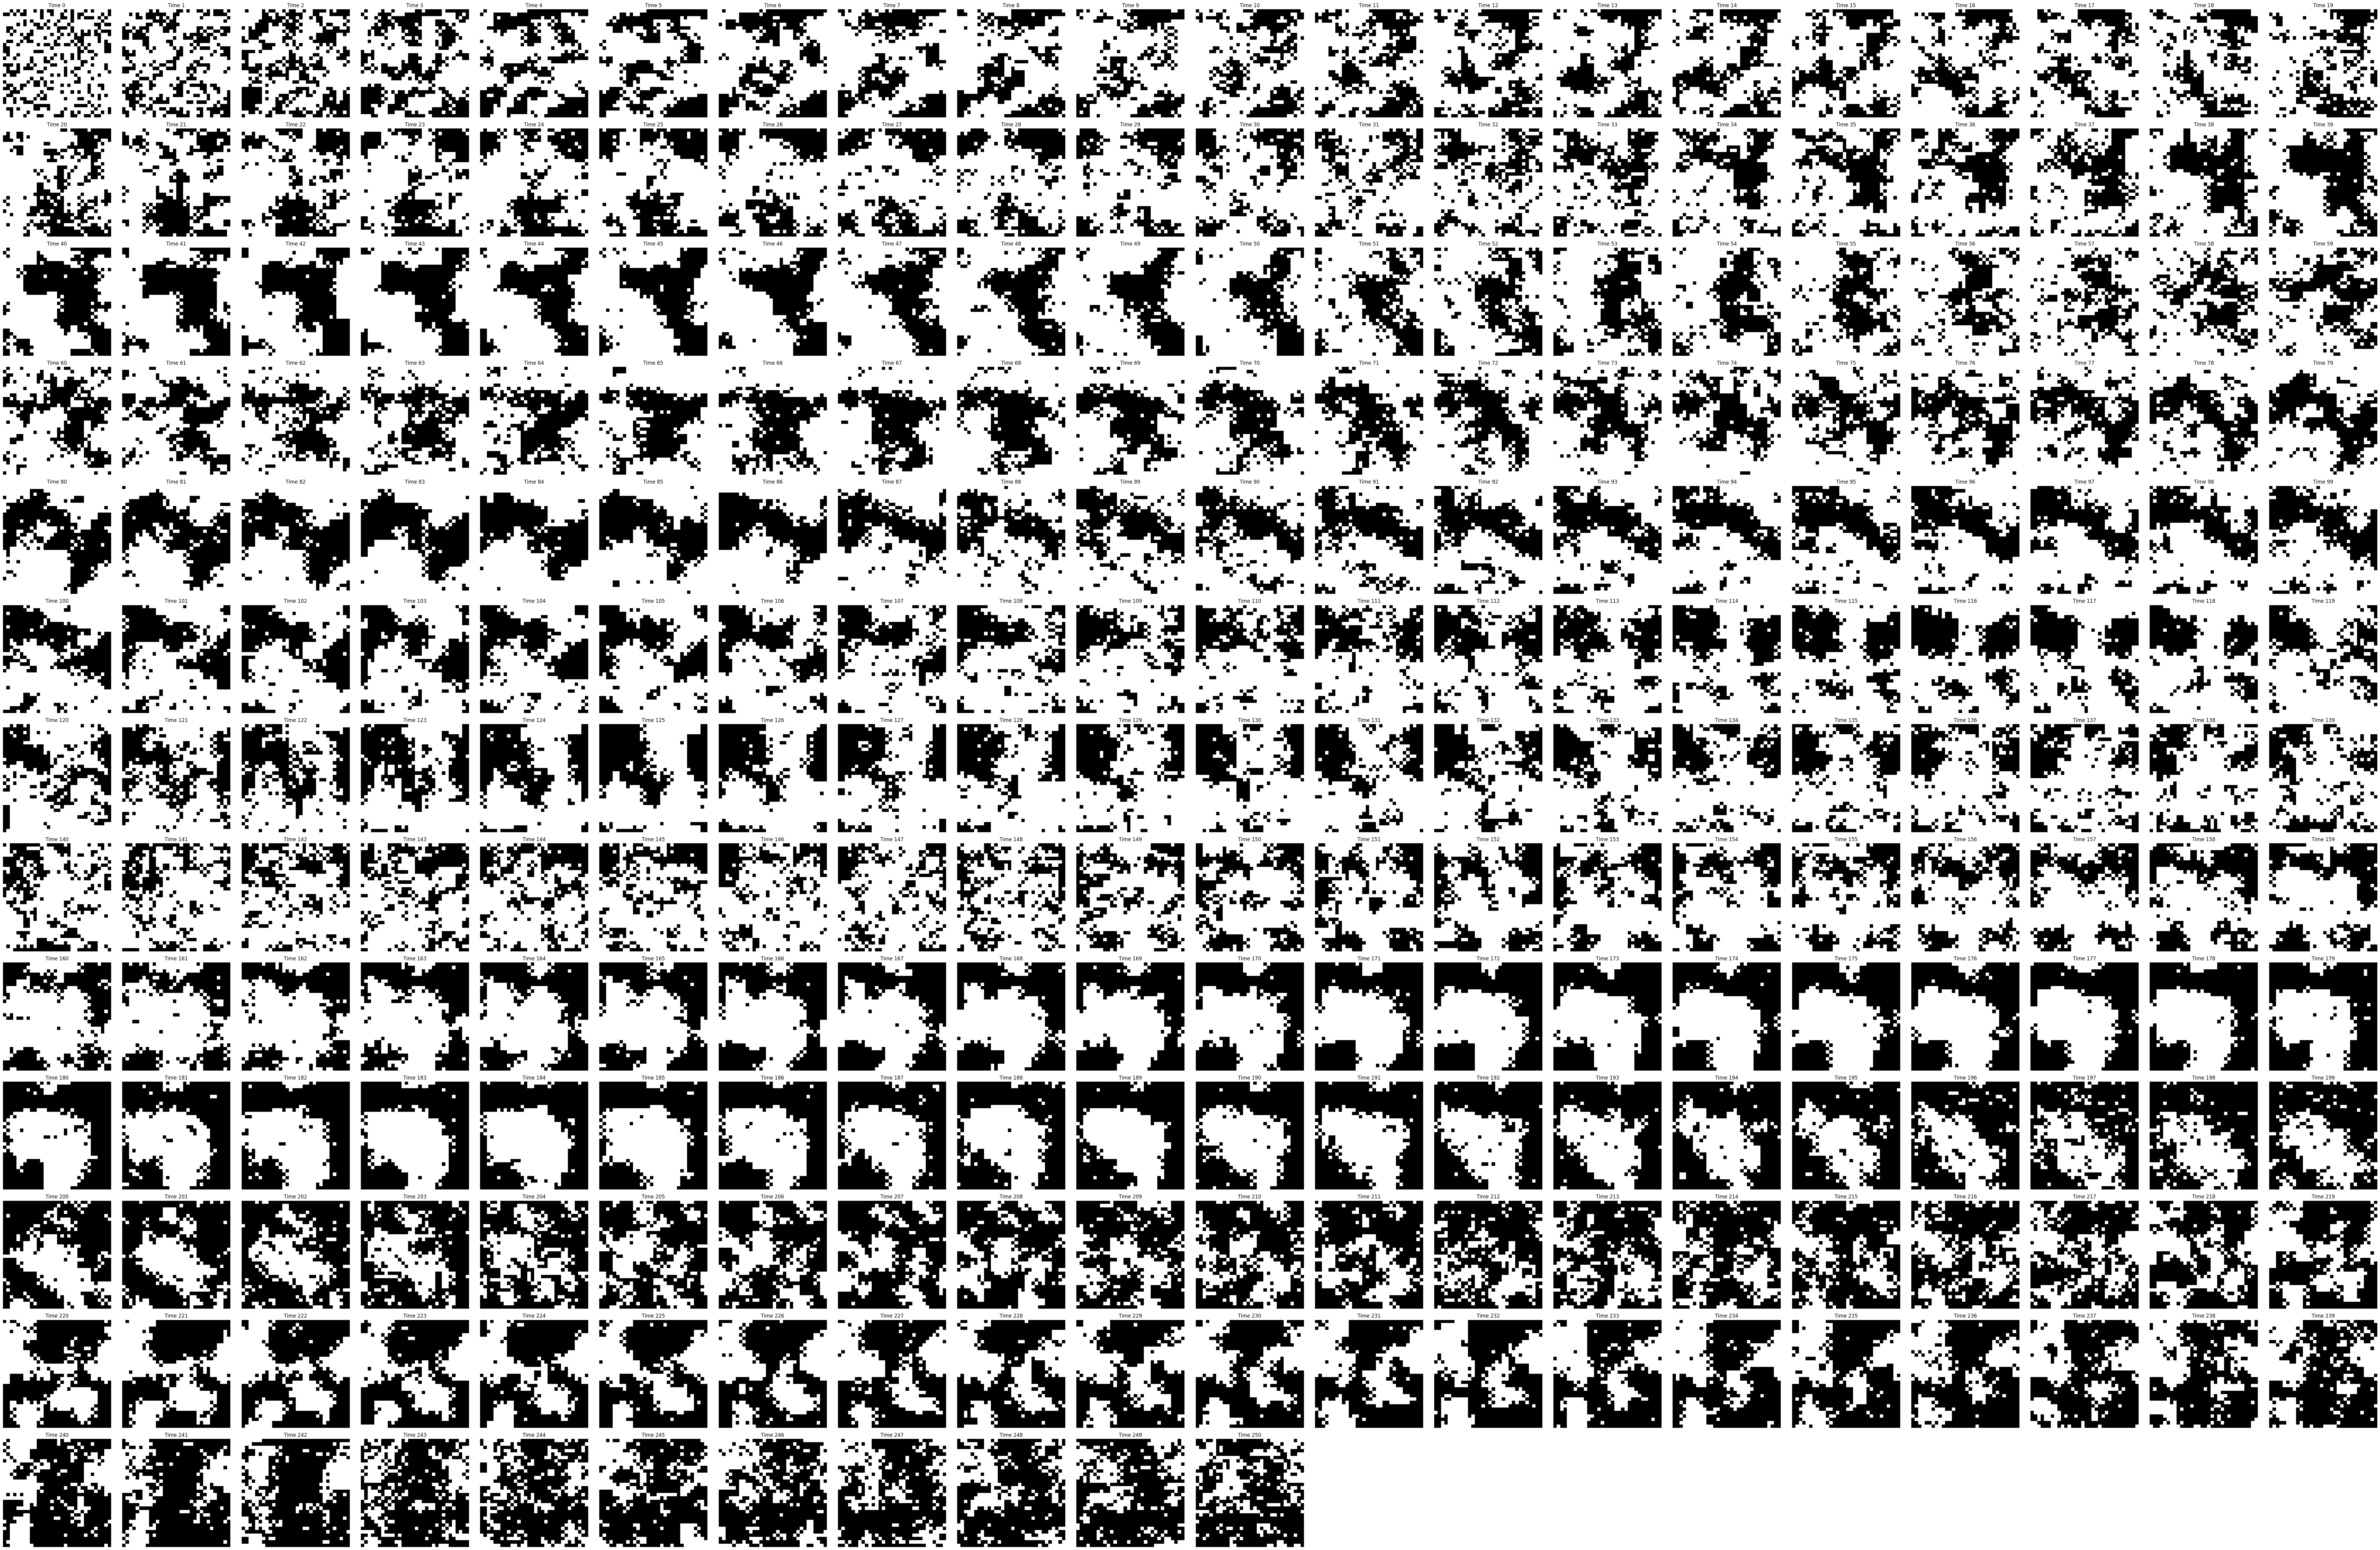

In [127]:
plot_array_list(full_grids_without_krach, max_cols=20)

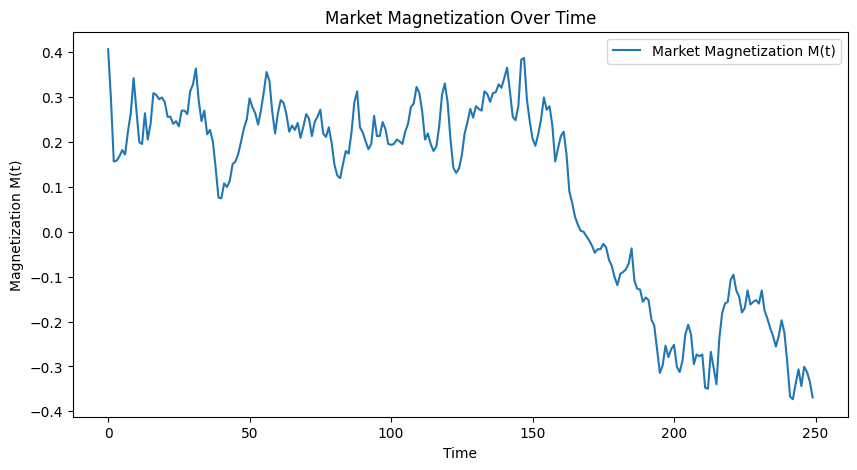

In [128]:
plt.figure(figsize=(10, 5))
plt.plot(magnetisation, label="Market Magnetization M(t)")
plt.xlabel("Time")
plt.ylabel("Magnetization M(t)")
plt.title("Market Magnetization Over Time")
plt.legend()
plt.show()

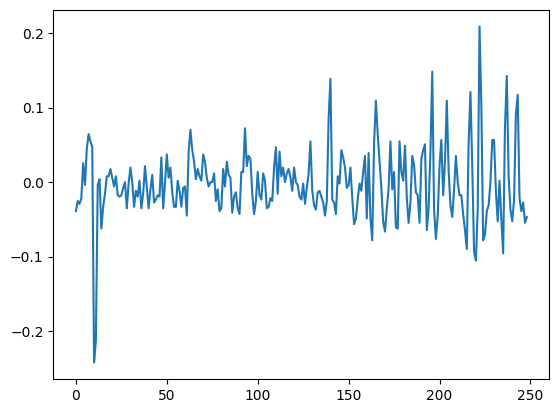

In [119]:
market_returns = np.diff(magnetisation)
plt.plot(market_returns)

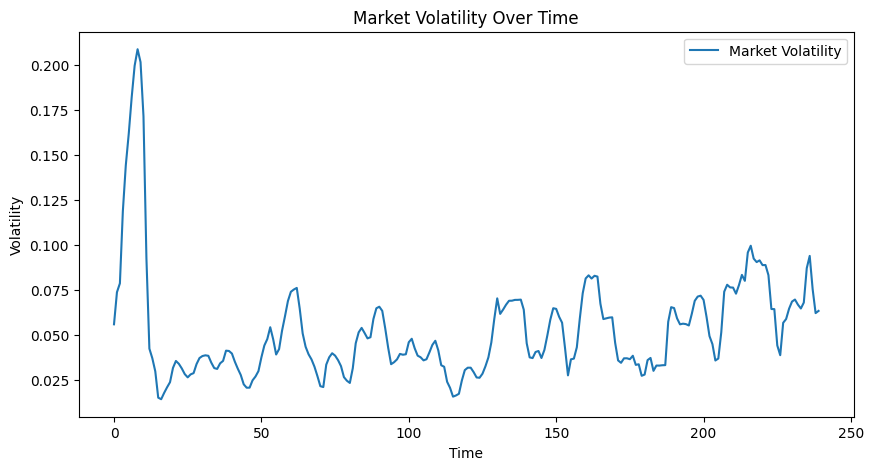

In [120]:
window_size = 10  # Fenêtre pour la volatilité
volatility = [np.std(magnetisation[i:i+window_size]) for i in range(len(magnetisation)-window_size)]

plt.figure(figsize=(10, 5))
plt.plot(volatility, label="Market Volatility")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.title("Market Volatility Over Time")
plt.legend()
plt.show()